In [1]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
map4 = folium.Map(location=[13.081689, 80.269032],tiles="Stamen Toner")

In [2]:
df = pd.read_csv("MOCK_DATA (3).csv",
index_col='Date1',parse_dates=True)
df.index.freq = 'MS'

<Axes: xlabel='Date1'>

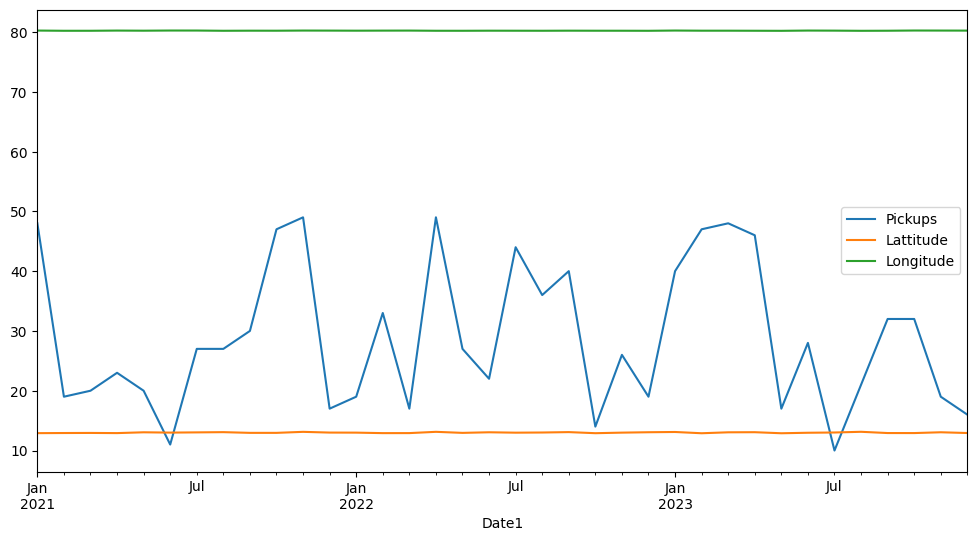

In [3]:
df.plot(figsize=(12,6))


In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose


In [5]:
for i,j in df.iterrows():
    folium.Marker(list((j['Lattitude'],j['Longitude']))).add_to(map4)


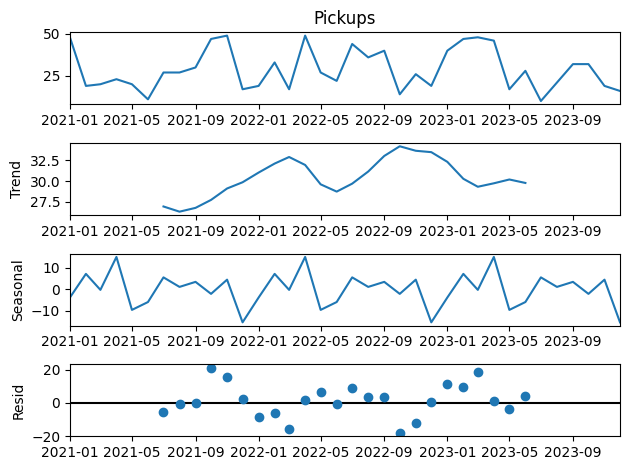

In [6]:
results = seasonal_decompose(df['Pickups'])
results.plot();

In [7]:
len(df)


36

In [8]:
train = df.iloc[:27]
test = df.iloc[27:]


In [26]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
train1 = train.drop(columns="Time")
test1 = test.drop(columns="Time")
test1

,Pickups,Lattitude,Longitude
Date1,,,
2023-04-01,46,13.063303,80.203378
2023-05-01,17,12.888277,80.192469
2023-06-01,28,12.971601,80.235667
2023-07-01,10,13.014259,80.222632
2023-08-01,21,13.132305,80.194442
2023-09-01,32,12.922735,80.207542
2023-10-01,32,12.919065,80.241733
2023-11-01,19,13.052893,80.234437
2023-12-01,16,12.926721,80.226658


In [10]:

datra = scaler.fit(train1)
scaled_train = scaler.transform(train1)
scaled_test = scaler.transform(test1)


In [11]:
from keras.preprocessing.sequence import TimeseriesGenerator


In [12]:
n_input = 3
n_features = 3
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [13]:
X,y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.97368421 0.06593586 0.87220929 0.21052632 0.15903596 0.03561197
 0.23684211 0.21953072 0.08877473]
Predict this y: 
 [[0.31578947 0.10442568 0.81798151]]


In [14]:
X.shape

(1, 3, 3)

In [15]:
n_input = 3
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [16]:

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [17]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [18]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               41600     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 41,701
Trainable params: 41,701
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.fit(generator,epochs=100)


Epoch 1/100
24/24 [==============================] - 2s 3ms/step - loss: 0.2180
Epoch 2/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1151
Epoch 3/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1115
Epoch 4/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1061
Epoch 5/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1040
Epoch 6/100
24/24 [==============================] - 0s 3ms/step - loss: 0.1013
Epoch 7/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0991
Epoch 8/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0990
Epoch 9/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0991
Epoch 10/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0940
Epoch 11/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0949
Epoch 12/100
24/24 [==============================] - 0s 3ms/step - loss: 0.0937
Epoch 13/100
24/24 [=================

27

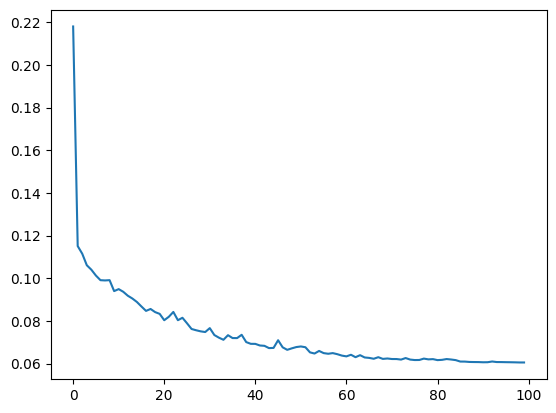

In [20]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)
len(scaled_train)

In [28]:
last_train_batch = scaled_test
last_train_batch = last_train_batch.reshape((3,3, n_features))
last_train_batch


array([[[ 0.92105263,  0.73540645,  0.14086093],
        [ 0.15789474, -0.00413596, -0.11017975],
        [ 0.44736842,  0.34793625,  0.88391416]],

       [[-0.02631579,  0.52817768,  0.5839529 ],
        [ 0.26315789,  1.02695923, -0.06478435],
        [ 0.55263158,  0.1414596 ,  0.23669234]],

       [[ 0.55263158,  0.12595312,  1.02352387],
        [ 0.21052632,  0.69141808,  0.85562112],
        [ 0.13157895,  0.15830524,  0.67660836]]])

In [29]:
model.summary()
#model.predict(last_train_batch)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               41600     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 41,701
Trainable params: 41,701
Non-trainable params: 0
_________________________________________________________________


In [24]:
print(scaler.inverse_transform([[0.3442267 ],
       [0.41866115],
       [0.55531806]]))

ValueError: non-broadcastable output operand with shape (3,1) doesn't match the broadcast shape (3,3)